Author :Gautam Kumar, gautamk2017@email.iimcal.ac.in, +16728339754


In [ ]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split, TimeSeriesSplit, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
from scipy.stats import chi2_contingency, ttest_ind

Please change this working directory based on paths on your system.

In [3]:
working_dir = "***************************"

Lets load the dataset and look at shape and first few rows of this dataset.

In [4]:
backup_main_df = pd.read_csv("dataset.csv")

In [5]:
main_df = backup_main_df.copy()

In [6]:
main_df.shape

(1000, 9)

In [7]:
main_df.loc[main_df.id == 586,:]

,id,water,uv,area,fertilizer_usage,yield,pesticides,region,categories
36,586,5340.0,91.224,8.429,2,67.321,2.933,0,"c,a"


In [8]:
main_df.head()

,id,water,uv,area,fertilizer_usage,yield,pesticides,region,categories
0,169,5.615,65.281,3.230,0,7.977,8.969,0,"b,a,c"
1,476,7.044,73.319,9.081,0,23.009,7.197,0,"c,a,d"
2,152,5.607,60.038,2.864,2,23.019,7.424,0,"d,a"
3,293,9.346,64.719,2.797,2,28.066,1.256,0,d
4,10,7.969,NaN,5.407,1,29.140,0.274,0,"c,d"


so, the dataset has 1000 rows and 9 columns. Now lets look at the datatypes of columns of this dataframe. We  see tha the commma separated list is called pesticides-used in the document's problem statement, but in the dataset that column is called categories.

In [9]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1000 non-null   int64  
 1   water             958 non-null    float64
 2   uv                949 non-null    float64
 3   area              1000 non-null   float64
 4   fertilizer_usage  1000 non-null   int64  
 5   yield             1000 non-null   float64
 6   pesticides        1000 non-null   float64
 7   region            1000 non-null   int64  
 8   categories        1000 non-null   object 
dtypes: float64(5), int64(3), object(1)
memory usage: 70.4+ KB


We see that only categories are non numeric types and rest columns are of numeric types.Although we are getting numeric values for region,fertilizer usage these are categorical values and has been coded as numeric numbers. But we have to considet them as categorical levels. We also See that count of Non Null values are less than number of rows for columns water(958) and uv(949), which means that there are missing values(NAs) in these columns.

Lets look at the statistical summary of the dataset

In [10]:
main_df.describe()

,id,water,uv,area,fertilizer_usage,yield,pesticides,region
count,1000.000000,958.000000,949.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,499.500000,12.223546,73.957488,8.098848,2.12300,58.758571,3.452301,3.039000
std,288.819436,172.335566,9.904063,2.692632,1.52256,24.563683,2.076921,1.883886
min,0.000000,0.072000,45.264000,0.263000,0.00000,2.843000,0.014000,0.000000
25%,249.750000,4.584750,66.502000,6.297000,1.00000,40.698000,1.804500,2.000000
50%,499.500000,6.476000,73.689000,7.987500,2.00000,55.602500,3.275500,2.000000
75%,749.250000,8.758750,80.554000,9.900250,3.00000,73.645500,4.916000,5.000000
max,999.000000,5340.000000,106.310000,18.311000,5.00000,148.845000,9.532000,6.000000


We see that only categories are non numeric types and rest columns are of numeric types.Although we are getting numeric values for region,fertilizer usage these are categorical values and has been coded as numeric numbers. But we have to considet them as categorical levels. We also See that count of Non Null values are less than number of rows for columns water(958) and uv(949), which means that there are missing values(NAs) in these columns.

Yield has an average of 58.75 but has signs of right skewed distribution which means median < mean.

Also we see that water column has max value of 5340 while its average is 12.22, so this value with 5340 looks like an outlier/noise. We will handle it while doing exploratory data analysis. Now lets see the number of unique values in region and fertilizer_usage column.

In [11]:
main_df.region.unique()

array([0, 1, 2, 3, 4, 5, 6])

In [12]:
main_df.fertilizer_usage.unique()

array([0, 2, 1, 4, 3, 5])

In [13]:
main_df.loc[main_df.id == 586,:]

,id,water,uv,area,fertilizer_usage,yield,pesticides,region,categories
36,586,5340.0,91.224,8.429,2,67.321,2.933,0,"c,a"


We see that region and fertilizer_usage have 7 and 6 unique values for 1000 rows of dataset, so these are categorical columns. So we will apply string data type for these two columns.

In [14]:
main_df.region = main_df.region.apply(str)
main_df.fertilizer_usage = main_df.fertilizer_usage.apply(str)

In [15]:
main_df.loc[main_df.id == 586,:]

,id,water,uv,area,fertilizer_usage,yield,pesticides,region,categories
36,586,5340.0,91.224,8.429,2,67.321,2.933,0,"c,a"


# Missing Value Analysis

We will check if missing values are random or we see any pattern in the missing values in the columns water and uv.

In [16]:
main_df.isna().sum()

id                   0
water               42
uv                  51
area                 0
fertilizer_usage     0
yield                0
pesticides           0
region               0
categories           0
dtype: int64

In [17]:
main_water_NA_df = main_df.loc[main_df.water.isna(),:]

main_water_NA_df.head()

In [18]:
main_water_NA_df.fertilizer_usage.value_counts()

fertilizer_usage
1    9
2    9
0    8
3    8
4    7
5    1
Name: count, dtype: int64

we see that almost all the categories of fertilizer usage have 7-9 missing rows with missing value except cateogory - 1, which has just 1 row with missing value. It will beed further business context to see if category-1 corresponds to any specific situation which can result in missing data.

In [19]:
main_water_NA_df.region.value_counts()

region
2    14
6     9
1     6
0     5
3     3
4     3
5     2
Name: count, dtype: int64

We see that, different regions have missing rows counts region-2 having highest 14 rows, vs. region-2 having 2 rows. But lets check using a chi-suare test if this missingness is random. Lets look at the heatmap for null values in the dataframe.

<Axes: >

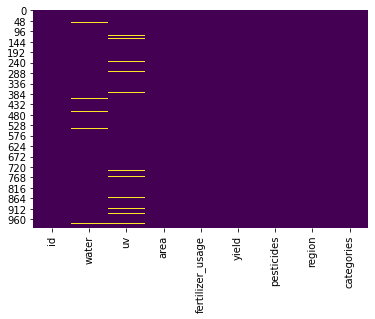

In [20]:
sns.heatmap(main_df.isnull(), cbar=False, cmap='viridis')


We see that water and uv both have similar missingness pattern.

In [21]:
#    Perform Chi-Square test between missing values in a categorical column and another categorical column.

from scipy.stats import chi2_contingency, ttest_ind

# 3. Statistical Tests for Patterns in Missingness
def chi_square_missingness(df, cat_col, other_cat_col):
    """

    """
    # Create a contingency table
    contingency_table = pd.crosstab(df[cat_col].isnull(), df[other_cat_col])
    chi2, p, dof, _ = chi2_contingency(contingency_table)
    return p

for cat_col in ['water', 'uv','region']:
    for other_col in ['water', 'uv','region']:
        if cat_col != other_col:
            p_value = chi_square_missingness(main_df, cat_col, other_col)
            print(f"P-value for {cat_col} missingness with {other_col}: {p_value}")


P-value for water missingness with uv: 0.5123616896597184
P-value for water missingness with region: 0.6425883244740025
P-value for uv missingness with water: 0.4123495264651363
P-value for uv missingness with region: 0.9252302604347016
P-value for region missingness with water: 1.0
P-value for region missingness with uv: 1.0


We see that all the pairs of columns have a p-value >= 0.05 for chi-square test which means that, missingness here is random.Lets check the expected values of numeric columns with respect to missing data and non missing data set.

In [22]:
#Perform T-test between missing and non-missing groups in a numeric column.
def t_test_missingness(df, cat_col, num_col):
    missing = df[df[cat_col].isnull()][num_col]
    non_missing = df[df[cat_col].notnull()][num_col]
    t_stat, p_value = ttest_ind(missing, non_missing, nan_policy='omit')
    return p_value

for cat_col in ['water', 'uv']:
    for num_col in ['area','yield','pesticides']:
        p_value = t_test_missingness(main_df, cat_col, num_col)
        print(f"P-value for {cat_col} missingness with {num_col}: {p_value}")

P-value for water missingness with area: 0.09304920773226674
P-value for water missingness with yield: 0.48115485236933664
P-value for water missingness with pesticides: 0.8748421967982736
P-value for uv missingness with area: 0.8898932267802974
P-value for uv missingness with yield: 0.5749233490776298
P-value for uv missingness with pesticides: 0.8309638688301395


We see that all the pairs of columns have p-value >= 0.05 for t-test between pairs of categorical and numerical columns, which means that missingness is random with no pattern. We will replace the missing rows with mean of the column.

In [23]:
main_df['water'] = main_df['water'].fillna(main_df['water'].mean())
main_df['uv'] = main_df['uv'].fillna(main_df['uv'].mean())

In [24]:
main_df.head()

,id,water,uv,area,fertilizer_usage,yield,pesticides,region,categories
0,169,5.615,65.281000,3.230,0,7.977,8.969,0,"b,a,c"
1,476,7.044,73.319000,9.081,0,23.009,7.197,0,"c,a,d"
2,152,5.607,60.038000,2.864,2,23.019,7.424,0,"d,a"
3,293,9.346,64.719000,2.797,2,28.066,1.256,0,d
4,10,7.969,73.957488,5.407,1,29.140,0.274,0,"c,d"


# Outlier detection

Lets see distribution of numeric columns.

<Axes: >

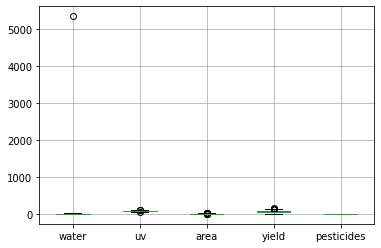

In [25]:
main_df.loc[:, ~main_df.columns.isin(['id','categories'])].boxplot()

The box plot shows there are two values in water and uv columns which are statistically outliers(based in IQR) based on inter quartile range so looks like outliers. This value is water(5340), it does look like a clear outlier. becaue the value is way off than other values, lets remove this specific value and then look at the box plot again.

In [26]:
main_df = main_df.loc[main_df.id != 586,:]

<Axes: >

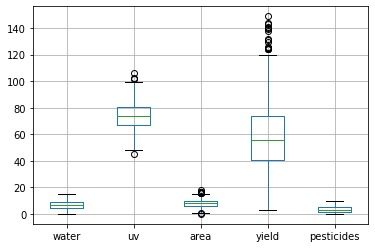

In [27]:
main_df.loc[:, ~main_df.columns.isin(['id','categories'])].boxplot()

In [28]:
pip install -U matplotlib

Requirement already up-to-date: matplotlib in /Users/user/opt/anaconda3/lib/python3.8/site-packages (3.7.5)
Note: you may need to restart the kernel to use updated packages.


We see there are still some outliers statistically, in yield column, area column and uv column. But these do not look as far from the main distribution as we saw in case of water= 5340. So We will not be removing these rows.

Based on the business understanding of the columns, here target variable is 'Yield', because this will decide how much money farm can earn, as output of farm is how much crop is its yield. So we will do this analysis based on this target columns.All other columns like water, uv, area of land, pesticides are input to the farming activity and crop yield is the output of this farming process.

In [29]:
main_numeric_df = main_df.loc[:, main_df.columns.isin(['water','uv','area','pesticides','yield'])]
#main_selected_df.hist()

In [30]:
main_numeric_df.head()

,water,uv,area,yield,pesticides
0,5.615,65.281000,3.230,7.977,8.969
1,7.044,73.319000,9.081,23.009,7.197
2,5.607,60.038000,2.864,23.019,7.424
3,9.346,64.719000,2.797,28.066,1.256
4,7.969,73.957488,5.407,29.140,0.274


Current Column being plotted..  water


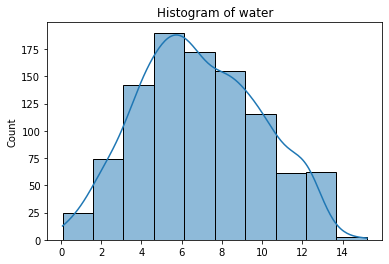

Current Column being plotted..  uv


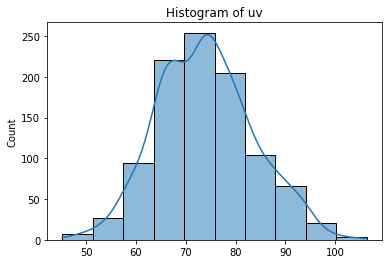

Current Column being plotted..  area


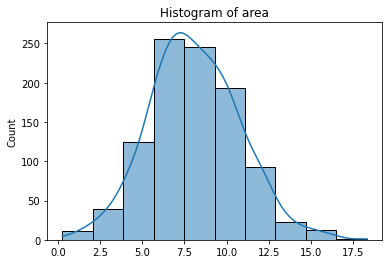

Current Column being plotted..  yield


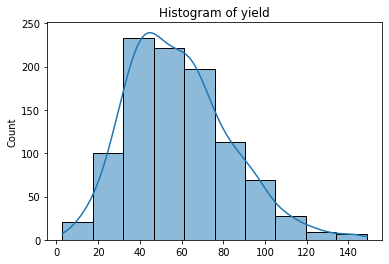

Current Column being plotted..  pesticides


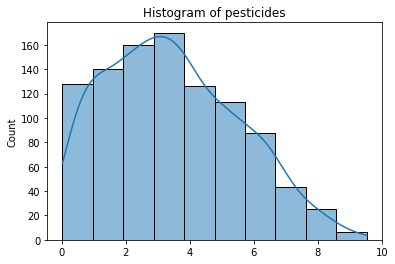

In [31]:
import seaborn as sns

#main_selected_df = main_df.loc[:, ~main_df.columns.isin(['id','categories'])]]


# Loop through each column and plot a histogram
for col in main_numeric_df.columns:
    print("Current Column being plotted.. ",col)
    plt.figure()
    sns.histplot(main_numeric_df[col].to_numpy(), bins=10, kde=True)
    plt.title(f'Histogram of {col}')
    plt.show()




We see these columns 'water','uv','yield','area' they have approx. normal distributions. pesticides looks more right skewed with larger values on the right side.

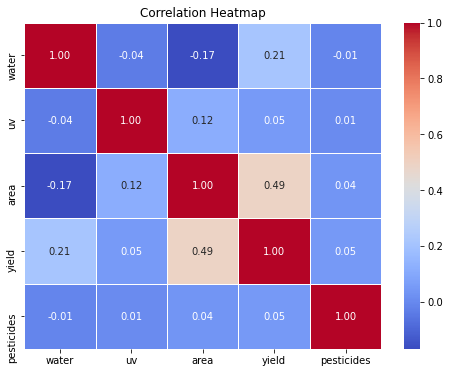

In [32]:
# Compute the correlation matrix
correlation_matrix = main_numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

We do not see any strong correlation(Something like more than 70% correlaition) among the numeric columns, which means the input features are mostly independent to each other. We do see a resonable(0.49) corrleation between area and yield, which makes sense because a larger farm field should result in a higher yield.

# Feature Egnineering

We see that the last column is list of pesticides used. This column has two dimensions of information, No of pesticides used and actualy pesticides used. Lets create count of pesticides used as one column and one column for each of the pesticides used with 0 and 1 representing their presnece or absense.

In [33]:
# Step 1: Create a column with the count of characters in 'categories'
main_df['category_count'] = main_df['categories'].apply(lambda x: len(x.split(',')))

# Step 2: Create one-hot encoded columns for each character
# Split the 'categories' column into lists of characters
main_df['categories_list'] = main_df['categories'].apply(lambda x: x.split(','))




In [34]:
main_df.head()

,id,water,uv,area,fertilizer_usage,yield,pesticides,region,categories,category_count,categories_list
0,169,5.615,65.281000,3.230,0,7.977,8.969,0,"b,a,c",3,"[b, a, c]"
1,476,7.044,73.319000,9.081,0,23.009,7.197,0,"c,a,d",3,"[c, a, d]"
2,152,5.607,60.038000,2.864,2,23.019,7.424,0,"d,a",2,"[d, a]"
3,293,9.346,64.719000,2.797,2,28.066,1.256,0,d,1,[d]
4,10,7.969,73.957488,5.407,1,29.140,0.274,0,"c,d",2,"[c, d]"


Lets create dummy variables for categories_list(which is comma separated list of pesticides used.

In [35]:
# One-Hot Encoding
# One-Hot Encoding
one_hot_encoded_df = main_df['categories_list'].explode().str.get_dummies().groupby(level=0).sum()

# Add prefix to column names
one_hot_encoded_df.columns = [f"Categories_{col}" for col in one_hot_encoded_df.columns]


#one_hot_encoded = main_df['categories_list'].explode().str.get_dummies().sum(level=0)



In [36]:
# Concatenate with original DataFrame
main_one_hot_df = pd.concat([main_df, one_hot_encoded_df], axis=1)

main_one_hot_df = main_one_hot_df.drop(['categories_list','categories'],axis = 1)
#print(df_one_hot)

In [37]:
main_one_hot_df.head()

,id,water,uv,area,fertilizer_usage,yield,pesticides,region,category_count,Categories_a,Categories_b,Categories_c,Categories_d
0,169,5.615,65.281000,3.230,0,7.977,8.969,0,3,1,1,1,0
1,476,7.044,73.319000,9.081,0,23.009,7.197,0,3,1,0,1,1
2,152,5.607,60.038000,2.864,2,23.019,7.424,0,2,1,0,0,1
3,293,9.346,64.719000,2.797,2,28.066,1.256,0,1,0,0,0,1
4,10,7.969,73.957488,5.407,1,29.140,0.274,0,2,0,0,1,1


In [38]:
main_one_hot_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                999 non-null    int64  
 1   water             999 non-null    float64
 2   uv                999 non-null    float64
 3   area              999 non-null    float64
 4   fertilizer_usage  999 non-null    object 
 5   yield             999 non-null    float64
 6   pesticides        999 non-null    float64
 7   region            999 non-null    object 
 8   category_count    999 non-null    int64  
 9   Categories_a      999 non-null    int64  
 10  Categories_b      999 non-null    int64  
 11  Categories_c      999 non-null    int64  
 12  Categories_d      999 non-null    int64  
dtypes: float64(5), int64(6), object(2)
memory usage: 109.3+ KB


Now we have new features representing the count of pesticide categories and one hot encoded columns for pesticides categories, so we have deleted the original list columns.

Now lets look at the box plot of output column 'yield' w.r.t other input categorial columns to check which features have an effect on the yield.

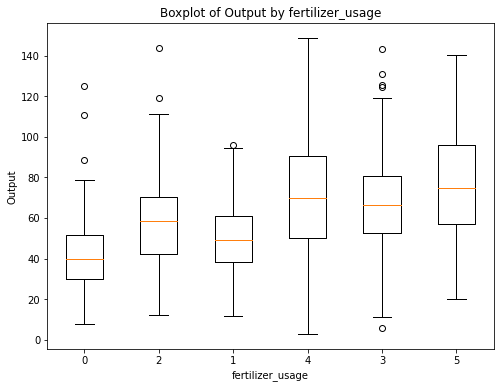

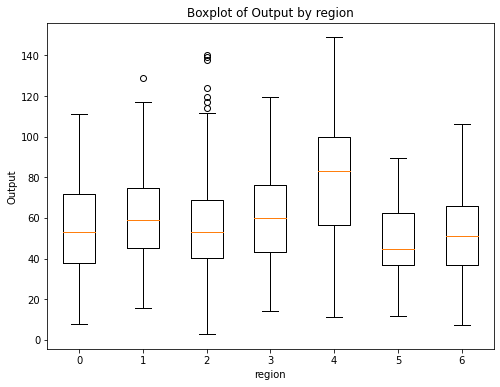

In [39]:
# Get categorical columns
categorical_cols = main_one_hot_df.select_dtypes(include=['object']).columns

# Plot boxplots for each categorical column
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    plt.boxplot([main_one_hot_df.loc[main_one_hot_df[col] == cat, 'yield'] for cat in main_one_hot_df[col].unique()], labels=main_one_hot_df[col].unique())
    plt.title(f'Boxplot of Output by {col}')
    plt.xlabel(col)
    plt.ylabel('Output')
    plt.show()

We see the expected yield follows the increasing order for fertilizer typer 0 -> 5 in the same order.For example fertilizer_usage type '5' has the highest expected yield compared followed by type 4,3,2,1,0 etc. We also see that Region 4 has the highest expected yield followed by 3 and region 1. This shows that both region and fertiliezer type has an effect on the output colulmn yield.

Lets create dummy variables for region and fertilizer usage so that we can build a predictive model for yield column.

In [133]:

# One-Hot Encoding
one_hot_fu_df = main_one_hot_df['fertilizer_usage'].explode().str.get_dummies().groupby(level=0).sum()
one_hot_fu_df.columns = [f"fertilizer_usage_{col}" for col in one_hot_fu_df.columns]
# Concatenate with original DataFrame
one_hot_fu_df = pd.concat([main_one_hot_df, one_hot_fu_df], axis=1)





In [41]:
one_hot_fu_df.head()

,id,water,uv,area,fertilizer_usage,yield,pesticides,region,category_count,Categories_a,Categories_b,Categories_c,Categories_d,fertilizer_usage_0,fertilizer_usage_1,fertilizer_usage_2,fertilizer_usage_3,fertilizer_usage_4,fertilizer_usage_5
0,169,5.615,65.281000,3.230,0,7.977,8.969,0,3,1,1,1,0,1,0,0,0,0,0
1,476,7.044,73.319000,9.081,0,23.009,7.197,0,3,1,0,1,1,1,0,0,0,0,0
2,152,5.607,60.038000,2.864,2,23.019,7.424,0,2,1,0,0,1,0,0,1,0,0,0
3,293,9.346,64.719000,2.797,2,28.066,1.256,0,1,0,0,0,1,0,0,1,0,0,0
4,10,7.969,73.957488,5.407,1,29.140,0.274,0,2,0,0,1,1,0,1,0,0,0,0


In [42]:
one_hot_reg_df = main_one_hot_df['region'].explode().str.get_dummies().groupby(level=0).sum()
one_hot_reg_df.columns = [f"region_{col}" for col in one_hot_reg_df.columns]


one_hot_fu_reg_df = pd.concat([one_hot_fu_df, one_hot_reg_df], axis=1)




In [43]:
one_hot_fu_reg_df.head()

,id,water,uv,area,fertilizer_usage,yield,pesticides,region,category_count,Categories_a,...,fertilizer_usage_3,fertilizer_usage_4,fertilizer_usage_5,region_0,region_1,region_2,region_3,region_4,region_5,region_6
0,169,5.615,65.281000,3.230,0,7.977,8.969,0,3,1,...,0,0,0,1,0,0,0,0,0,0
1,476,7.044,73.319000,9.081,0,23.009,7.197,0,3,1,...,0,0,0,1,0,0,0,0,0,0
2,152,5.607,60.038000,2.864,2,23.019,7.424,0,2,1,...,0,0,0,1,0,0,0,0,0,0
3,293,9.346,64.719000,2.797,2,28.066,1.256,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,10,7.969,73.957488,5.407,1,29.140,0.274,0,2,0,...,0,0,0,1,0,0,0,0,0,0


In [44]:
one_hot_fu_df.head()

,id,water,uv,area,fertilizer_usage,yield,pesticides,region,category_count,Categories_a,Categories_b,Categories_c,Categories_d,fertilizer_usage_0,fertilizer_usage_1,fertilizer_usage_2,fertilizer_usage_3,fertilizer_usage_4,fertilizer_usage_5
0,169,5.615,65.281000,3.230,0,7.977,8.969,0,3,1,1,1,0,1,0,0,0,0,0
1,476,7.044,73.319000,9.081,0,23.009,7.197,0,3,1,0,1,1,1,0,0,0,0,0
2,152,5.607,60.038000,2.864,2,23.019,7.424,0,2,1,0,0,1,0,0,1,0,0,0
3,293,9.346,64.719000,2.797,2,28.066,1.256,0,1,0,0,0,1,0,0,1,0,0,0
4,10,7.969,73.957488,5.407,1,29.140,0.274,0,2,0,0,1,1,0,1,0,0,0,0


Now we can drop the original columns for which we have created one hot encoded features.

In [45]:
one_hot_fu_reg_df = one_hot_fu_reg_df.drop(['id','region','fertilizer_usage'],axis = 1)

Now we will try to find the most important features of using random forest feature importance and xgboost feature importance.

In [46]:
import pandas as pd
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


#     Train a Random Forest model and plot feature importance.

#     Args:
#         df (pd.DataFrame): Input DataFrame with features and output column.
#         output_column (str): Name of the output column.
#         test_size (float, optional): Proportion of data for testing. Defaults to 0.2.
#         n_estimators (int, optional): Number of trees in the Random Forest. Defaults to 100.


def plot_rf_feature_importance(df, output_column, test_size=0.2, n_estimators=100):
 

    # Split data into training and testing sets
    X = df.drop(output_column, axis=1)  # input features
    y = df[output_column]  # output feature
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Train Random Forest model
    rf_model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    rf_model.fit(X_train, y_train)

    # Get feature importance
    feature_importance = rf_model.feature_importances_

    # Create a DataFrame with feature importance
    fi_rf_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

    # Sort the DataFrame by importance in descending order
    fi_rf_df = fi_rf_df.sort_values(by='Importance', ascending=True)

    # Plot feature importance
    plt.figure(figsize=(10, 6))
    plt.barh(fi_rf_df['Feature'], fi_rf_df['Importance'])
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.title('Random Forest Feature Importance')
    plt.show()
    

def plot_xgb_feature_importance(df, output_column, test_size=0.2):
    """
    Train an XGBoost model and plot feature importance.

    Args:
        df (pd.DataFrame): Input DataFrame with features and output column.
        output_column (str): Name of the output column.
        test_size (float, optional): Proportion of data for testing. Defaults to 0.2.
    """

    # Split data into training and testing sets
    X = df.drop(output_column, axis=1)  # input features
    y = df[output_column]  # output feature
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Train XGBoost model
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='rmse')
    xgb_model.fit(X_train, y_train)

    # Get feature importance
    feature_importance = xgb_model.feature_importances_

    # Create a DataFrame with feature importance
    fi_xg_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

    # Sort the DataFrame by importance in descending order
    fi_xg_df = fi_xg_df.sort_values(by='Importance', ascending=True)

    # Plot feature importance
    plt.figure(figsize=(10, 6))
    plt.barh(fi_xg_df['Feature'], fi_xg_df['Importance'])
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.title('XGBoost Feature Importance')
    plt.show()
    return fi_xg_df





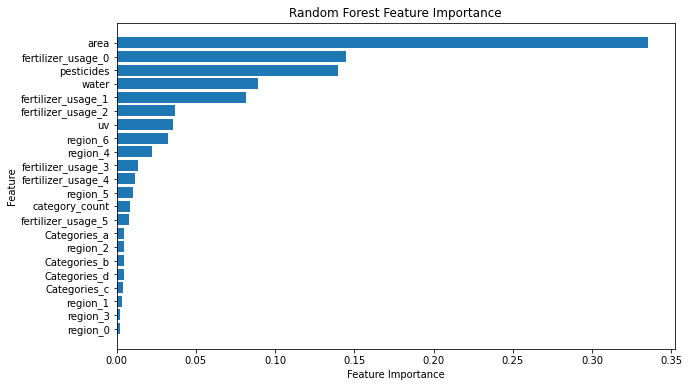

In [47]:
rf_feat_importance_df = plot_rf_feature_importance(one_hot_fu_reg_df,'yield',)


Random Forest shows that area,uv, pesticides,water followed by some types of fertilizer usage(0,1,2) and region(6,4) are most important features. Lets see What are the important features based on xgboost modelling.

In [48]:
one_hot_fu_reg_df.head()

,water,uv,area,yield,pesticides,category_count,Categories_a,Categories_b,Categories_c,Categories_d,...,fertilizer_usage_3,fertilizer_usage_4,fertilizer_usage_5,region_0,region_1,region_2,region_3,region_4,region_5,region_6
0,5.615,65.281000,3.230,7.977,8.969,3,1,1,1,0,...,0,0,0,1,0,0,0,0,0,0
1,7.044,73.319000,9.081,23.009,7.197,3,1,0,1,1,...,0,0,0,1,0,0,0,0,0,0
2,5.607,60.038000,2.864,23.019,7.424,2,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,9.346,64.719000,2.797,28.066,1.256,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,7.969,73.957488,5.407,29.140,0.274,2,0,0,1,1,...,0,0,0,1,0,0,0,0,0,0


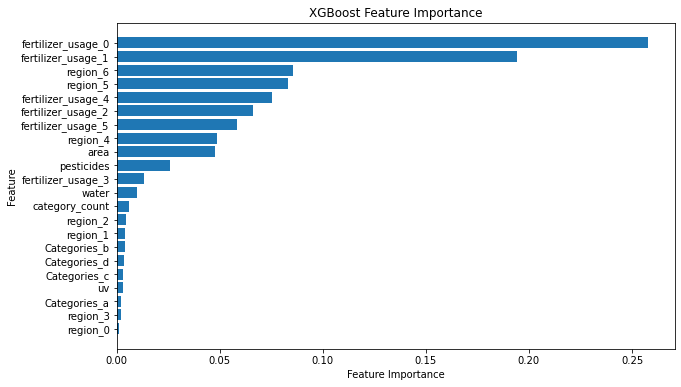

In [49]:
xg_feat_importance_df = plot_xgb_feature_importance(one_hot_fu_reg_df,'yield',)

We see that based on xgboost important features region(0,1,2,4,6,5), fertilizer usage types(0,1,4,2,5),pesticides, area, region(6,5,4) are the most important features for prediction of yield. We will use these columns for modelling we see that category count is also important features by both random forest and xgboost feature importance.We see that some some features can be controlled and modified by farm owners for example they can chose fertilizer, water input,pesticides but they can not change features like region of their farms unless they buy farms at some other place. We should always select a smaller model than a larger model. So I will use fertilizer (0,1,2,3,4,5),region(6,5,4),area,pesticides, water. Also we see that uv(sun light) per hectare has a very less variable importance. So we are considering below important features for actual modelling.

In [96]:
important_features = ['fertilizer_usage_0','fertilizer_usage_1','fertilizer_usage_2','fertilizer_usage_4','fertilizer_usage_5',
                      'fertilizer_usage_3','region_6','region_5','region_4','pesticides','water','area','category_count','yield']

In [97]:
one_hot_fu_reg_df.head(5)

,water,uv,area,yield,pesticides,category_count,Categories_a,Categories_b,Categories_c,Categories_d,...,fertilizer_usage_3,fertilizer_usage_4,fertilizer_usage_5,region_0,region_1,region_2,region_3,region_4,region_5,region_6
0,5.615,65.281000,3.230,7.977,8.969,3,1,1,1,0,...,0,0,0,1,0,0,0,0,0,0
1,7.044,73.319000,9.081,23.009,7.197,3,1,0,1,1,...,0,0,0,1,0,0,0,0,0,0
2,5.607,60.038000,2.864,23.019,7.424,2,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,9.346,64.719000,2.797,28.066,1.256,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,7.969,73.957488,5.407,29.140,0.274,2,0,0,1,1,...,0,0,0,1,0,0,0,0,0,0


# Actual Modeling

In [120]:
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import statsmodels.api as sm

class Modeling:
    def __init__(self, df, output_column):
        self.df = df
        self.output_column = output_column
        self.X = df.drop(output_column, axis=1)
        self.y = df[output_column]
    
    def adjusted_r_squared(self, y_true, y_pred, n, k):
        """
        Calculate adjusted R-squared.

        Args:
            y_true (array-like): Actual values.
            y_pred (array-like): Predicted values.
            n (int): Number of observations.
            k (int): Number of features.

        Returns:
            float: Adjusted R-squared.
        """
        r2 = r2_score(y_true, y_pred)
        adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)
        return adjusted_r2

    
#         Linear Regression with cross-validation and standardization.

#         Args:
#             cv (int, optional): Number of folds for cross-validation. Defaults to 5.
#             standardize_columns (list, optional): List of column names to standardize. Defaults to None.

#         Returns:
#             tuple: Results DataFrame, coefficients DataFrame, test sample with actual vs predicted values.
        
    def linear_regression(self, cv=5, standardize_columns=None):
        
        X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size=0.2, random_state=42)

        if standardize_columns:
            scaler = StandardScaler()
            X_train[standardize_columns] = scaler.fit_transform(X_train[standardize_columns])
            X_test[standardize_columns] = scaler.transform(X_test[standardize_columns])

        # Statsmodels Linear Regression
        X_train_sm = sm.add_constant(X_train)
        model = sm.OLS(y_train, X_train_sm).fit()

        # Cross-validation
        kf = KFold(n_splits=cv, shuffle=True, random_state=42)
        cv_scores = cross_val_score(LinearRegression(), X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
        cv_rmse = np.sqrt(-cv_scores)

        # Predict on test data
        y_pred_test = model.predict(sm.add_constant(X_test))

        # Calculate accuracy measures
        train_mse = mean_squared_error(y_train, model.predict(X_train_sm))
        test_mse = mean_squared_error(y_test, y_pred_test)
        train_rmse = np.sqrt(train_mse)
        test_rmse = np.sqrt(test_mse)
        train_mad = mean_absolute_error(y_train, model.predict(X_train_sm))
        test_mad = mean_absolute_error(y_test, y_pred_test)
        train_mape = mean_absolute_percentage_error(y_train, model.predict(X_train_sm))
        test_mape = mean_absolute_percentage_error(y_test, y_pred_test)
        adjusted_r_squared = model.rsquared_adj

        # Create a DataFrame with results
        results_df = pd.DataFrame({
            'Metric': ['Train RMSE', 'Test RMSE', 'Train MAD', 'Test MAD', 'Train MAPE', 'Test MAPE', 'Adjusted R-Squared'],
            'Value': [train_rmse, test_rmse, train_mad, test_mad, train_mape, test_mape, adjusted_r_squared]
        })

        # Create a DataFrame with coefficients
        coefficients_df = pd.DataFrame({
            'Feature': X_train.columns.tolist() + ['Constant'],
            'Coefficient': model.params.tolist()
        })

        # Create a DataFrame with actual vs predicted values for test data
        test_sample = pd.DataFrame({
            'Actual': y_test,
            'Predicted': y_pred_test
        })

        return results_df, coefficients_df, test_sample.sample(50)
    
 #         Random Forest with grid search and cross-validation
#         Args:
#             cv (int, optional): Number of folds for cross-validation. Defaults to 5.
#             param_grid (dict, optional): Hyperparameter grid for grid search. Defaults to None.

#         Returns:
#             tuple: Best parameters, results DataFrame, test sample with actual vs predicted values.

    
    def random_forest(self, cv=5, param_grid=None):
        
        X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size=0.2, random_state=42)

        if param_grid is None:
            param_grid = {
                'n_estimators': [100, 200, 300],
                'max_depth': [None, 5, 10],
                'min_samples_split': [2, 5, 10]
            }

        model = RandomForestRegressor(random_state=42)
        grid_search = GridSearchCV(model, param_grid, cv=cv, scoring='neg_mean_squared_error')
        grid_search.fit(X_train, y_train)

        y_pred_train = grid_search.best_estimator_.predict(X_train)
        y_pred_test = grid_search.best_estimator_.predict(X_test)

        # Calculate accuracy measures
        train_mse = mean_squared_error(y_train, y_pred_train)
        test_mse = mean_squared_error(y_test, y_pred_test)
        train_rmse = np.sqrt(train_mse)
        test_rmse = np.sqrt(test_mse)
        train_mad = mean_absolute_error(y_train, y_pred_train)
        test_mad = mean_absolute_error(y_test, y_pred_test)
        train_mape = mean_absolute_percentage_error(y_train, y_pred_train)
        test_mape = mean_absolute_percentage_error(y_test, y_pred_test)
        
        # Calculate adjusted R-squared
        n = len(y_test)  # Number of observations
        k = X_test.shape[1]  # Number of features
        adjusted_r2 = self.adjusted_r_squared(y_test, y_pred_test, n, k)


        # Create a DataFrame with results
        results_df = pd.DataFrame({
            'Metric': ['Train RMSE', 'Test RMSE', 'Train MAD', 'Test MAD', 'Train MAPE', 'Test MAPE', 'Adjusted R-squared'],
            'Value': [train_rmse, test_rmse, train_mad, test_mad, train_mape, test_mape, adjusted_r2]
        })

        # Create a DataFrame with actual vs predicted values for test data
        test_sample = pd.DataFrame({
            'Actual': y_test,
            'Predicted': y_pred_test
        })

        # Plot accuracy metrics against iterations
        train_errors = []
        test_errors = []
        for i in range(1, grid_search.best_estimator_.n_estimators + 1):
            model = RandomForestRegressor(n_estimators=i, random_state=42)
            model.fit(X_train, y_train)
            y_pred_train_iter = model.predict(X_train)
            y_pred_test_iter = model.predict(X_test)
            train_error = mean_squared_error(y_train, y_pred_train_iter)
            test_error = mean_squared_error(y_test, y_pred_test_iter)
            train_errors.append(train_error)
            test_errors.append(test_error)

        plt.plot(train_errors, label='Train Error')
        plt.plot(test_errors, label='Test Error')
        plt.xlabel('Iterations')
        plt.ylabel('Mean Squared Error')
        plt.title('Random Forest Error Plot')
        plt.legend()
        plt.show()

        return grid_search.best_params_, results_df, test_sample.sample(50)
    
    
#         XGBoost with grid search and cross-validation.

#         Args:
#             cv (int, optional): Number of folds for cross-validation. Defaults to 5.
#             param_grid (dict, optional): Hyperparameter grid for grid search. Defaults to None.

#         Returns:
#             tuple: Best parameters, results DataFrame, test sample with actual vs predicted values.

    def model_xgboost(self, cv=5, param_grid=None):
        
        X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size=0.2, random_state=42)

        if param_grid is None:
            param_grid = {
                'max_depth': [3, 5, ],
                'learning_rate': [0.1, 0.05],
                'n_estimators': [50, 100],
                'gamma': [0.1, 0.5],
                'subsample': [0.5, 0.8],
                'colsample_bytree': [0.5, 0.8],
                'reg_alpha': [0, 0.1],
                'reg_lambda': [0, 0.1]
            }

        model = XGBRegressor(random_state=42)
        grid_search = GridSearchCV(model, param_grid, cv=cv, scoring='neg_mean_squared_error')
        grid_search.fit(X_train, y_train)

        y_pred_train = grid_search.best_estimator_.predict(X_train)
        y_pred_test = grid_search.best_estimator_.predict(X_test)

        # Calculate accuracy metrics
        train_mse = mean_squared_error(y_train, y_pred_train)
        test_mse = mean_squared_error(y_test, y_pred_test)
        train_rmse = np.sqrt(train_mse)
        test_rmse = np.sqrt(test_mse)
        train_mad = mean_absolute_error(y_train, y_pred_train)
        test_mad = mean_absolute_error(y_test, y_pred_test)
        train_mape = mean_absolute_percentage_error(y_train, y_pred_train)
        test_mape = mean_absolute_percentage_error(y_test, y_pred_test)
        
         # Calculate adjusted R-squared
        n = len(y_test)  # Number of observations
        k = X_test.shape[1]  # Number of features
        adjusted_r2 = self.adjusted_r_squared(y_test, y_pred_test, n, k)


        # Create a DataFrame with results
        results_df = pd.DataFrame({
            'Metric': ['Train RMSE', 'Test RMSE', 'Train MAD', 'Test MAD', 'Train MAPE', 'Test MAPE', 'Adjusted R-squared'],
            'Value': [train_rmse, test_rmse, train_mad, test_mad, train_mape, test_mape, adjusted_r2]
        })


        # Create a DataFrame with actual vs predicted values for test data
        test_sample = pd.DataFrame({
            'Actual': y_test,
            'Predicted': y_pred_test
        })

        # Plot accuracy metrics during training
        train_errors = []
        test_errors = []
        for i in range(1, grid_search.best_estimator_.n_estimators + 1):
            model = XGBRegressor(n_estimators=i, random_state=42)
            model.fit(X_train, y_train)
            y_pred_train_iter = model.predict(X_train)
            y_pred_test_iter = model.predict(X_test)
            train_error = mean_squared_error(y_train, y_pred_train_iter)
            test_error = mean_squared_error(y_test, y_pred_test_iter)
            train_errors.append(train_error)
            test_errors.append(test_error)

        plt.plot(train_errors, label='Train Error')
        plt.plot(test_errors, label='Test Error')
        plt.xlabel('Iterations')
        plt.ylabel('Mean Squared Error')
        plt.title('XGBoost Error Plot')
        plt.legend()
        plt.show()

        return grid_search.best_params_, results_df, test_sample.sample(50)




In [121]:
# Example usage:
one_hot_imp_feature_df = one_hot_fu_reg_df[important_features]
modeling = Modeling(one_hot_imp_feature_df, 'yield')


In [122]:
#standardize_columns = 
lr_results_df, lr_coefficients_df, lr_test_sample = modeling.linear_regression(cv=5, standardize_columns = ['water', 'area','pesticides'])


print("Results:")
print(lr_results_df.head(20))
print("Coefficients:")
print(lr_coefficients_df)
print("Test Sample:")
print(lr_test_sample.head(10))

Results:
               Metric      Value
0          Train RMSE  12.744405
1           Test RMSE  13.041140
2           Train MAD  10.067901
3            Test MAD   9.944883
4          Train MAPE   0.224117
5           Test MAPE   0.222278
6  Adjusted R-Squared   0.718863
Coefficients:
               Feature  Coefficient
0   fertilizer_usage_0    60.202318
1   fertilizer_usage_1   -14.245090
2   fertilizer_usage_2    -1.744262
3   fertilizer_usage_4     5.711319
4   fertilizer_usage_5    25.547018
5   fertilizer_usage_3    30.242251
6             region_6    14.691082
7             region_5   -21.128487
8             region_4   -23.086602
9           pesticides     2.412243
10               water     1.251273
11                area     3.457359
12      category_count    17.667350
13            Constant    -1.111485
Test Sample:
     Actual  Predicted
364  54.193  41.923153
278  39.838  55.738191
936  61.919  38.025207
293  41.729  60.644963
523  30.533  23.690547
559  51.513  46.028397

Now lets check some of the assmputions of the linear regression for example: homoscedasticity and milti collinearity.

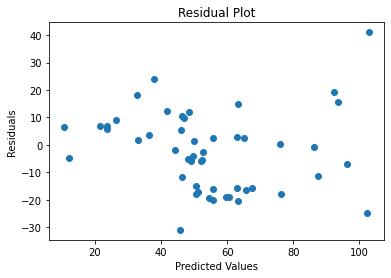

/Users/user/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


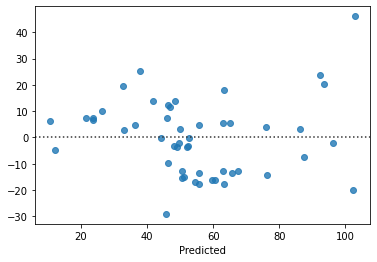

Breusch-Pagan test statistic: 0.046890038543245804
Breusch-Pagan p-value: 0.828566008852273
    VIF Factor            features
0     5.893164  fertilizer_usage_0
1     6.174677  fertilizer_usage_1
2     5.290514  fertilizer_usage_2
3     4.844043  fertilizer_usage_4
4     2.786006  fertilizer_usage_5
5     6.999778  fertilizer_usage_3
6     1.213811            region_6
7     1.074247            region_5
8     1.171175            region_4
9     1.008394          pesticides
10    1.146337               water
11    1.316561                area
12    1.016596      category_count


In [131]:
# 1. Check if relationship is actually close to linear
residuals = lr_test_sample.Actual - lr_test_sample.Predicted
plt.scatter(lr_test_sample.Predicted, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Check for non-random pattern in residuals
sns.residplot(lr_test_sample.Predicted, residuals)
plt.show()

# 2. Check for Heteroscedasticity using Breusch-Pagan test
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import het_breuschpagan

# Create a DataFrame with y_test and residuals
df = pd.DataFrame({'y_test': lr_test_sample.Actual, 'residuals': residuals})

# Fit a linear model
model = ols('residuals ~ y_test', data=df).fit()

# Perform Breusch-Pagan test
bp_test = het_breuschpagan(model.resid, model.model.exog)

print("Breusch-Pagan test statistic:", bp_test[0])
print("Breusch-Pagan p-value:", bp_test[1])

# 3. Check for VIF (Variance Inflation Factor)
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a DataFrame with all features
X = pd.DataFrame({col: one_hot_imp_feature_df[col] for col in one_hot_imp_feature_df.columns if col != 'yield'})

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

print(vif)


We see that residual plot of predicted vs residual does not show any cone like shape.also the breausch pagan test which checks assumption of homscedasticity(constant variance) does now show p 0.05, which means that we don't see enough evidence for presence of heteroscedasticity. also we see that VIF(Variance inflation factor) which checks presence of multi collinearity does not show any value more than > 10 which indicates there is no severe mlti colliniarity present. These evidence gives us a fare evidence that this linear regression model is not viltating assumptions.

We see that Adjusted R-square of the linear regression model is 0.71 which means 71% of the variance is explained by the model, which is a reasonably good number with the interpretability we get with linear regression. Also we see that root mean square error (RMSE) for training data is 12.74 and same for test data is 13.04.We also see that MAD(Mean absolute deviation) for test data(9.94) is lesser than train data MAD(10.06).This indicates that our model generalizes fairly well model is not severly overfitted. So, if interpretability of the model is important for us, we should use the linear model.

This model shows that features fertilizer_usage_0,fertilizer_usage_4,fertilizer_usage_5,fertilizer_usage_3 has positive coefficients(60.20,5.71,25.54,30.24), Also we see that category_count(which represents number of persticides types used has a positive coefficient(17.66). The positive coefficients indicates that increasing features these has an increasing impact on yield. For example we see that use of fertilizer 0 increases the crop yield by (60.20) compared to when fertilier 0 is not used. Similarly use of fertilizer 3 increases the crop yield by (30.24) compared to when fertilier 0 is not used, where as fertilizer 1 and 2 has negative coefficients () which means using these actually is expected to decrease he yield. We can recommend to avoid fertilizer 1 and 2. 

Also we see that region 6 is expected to having a positive impact on the yield. water and area also has positive coefficients (1.25, 3.45) which means that we can increase yield by increasing water input.We also see some actual vs predicted yield from some test data rows. Now lets model it using random forest and see the value of metrics.



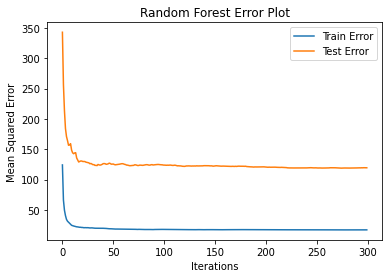

Best Parameters:
{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}
Results:
               Metric      Value
0          Train RMSE   4.142469
1           Test RMSE  10.930570
2           Train MAD   3.090021
3            Test MAD   8.290783
4          Train MAPE   0.067567
5           Test MAPE   0.164684
6  Adjusted R-squared   0.808367
Test Sample:
      Actual   Predicted
740  143.218  105.441530
121   55.399   41.310727
775   47.321   63.465217
381   58.239   42.019257
219   21.142   29.463997
293   41.729   36.980933
353   51.860   53.518520
534   36.103   28.149147
975   77.373   63.771657
319   45.314   31.325297
278   39.838   47.943083
815   23.874   32.288923
824   29.895   35.085023
412   64.370   68.062807
598   68.347   67.818500
954   68.505   71.653037
592   66.577   65.270543
347   50.892   47.866950
260   35.012   40.752590
222   22.288   25.872617
328   46.867   39.459027
896   50.185   57.107817
383   58.407   58.308500
826   30.133   44.874713
571   5

In [123]:
#rf_modeling = Modeling(one_hot_fu_reg_df, 'yield')  # Initialize the Modeling class
rf_best_params, rf_results_df, rf_test_sample = modeling.random_forest(cv = 5)
print("Best Parameters:")
print(rf_best_params)
print("Results:")
print(rf_results_df)
print("Test Sample:")
print(rf_test_sample)

Modeling using random forest shows us that goodness of fit adjusted R-sqaure increases to 0.80 which means its a better fit. Random forest reduces the test RMSE(10.93) compared to linear regression(13.04), but its more than train RMSE(4.14) for Random forest. This gives us an evidence that although complex models have better predictibility, it overfits more than a simpler model. Also in terms of test MAD(8.29)(Mean absolute deviation), it does better than Linear regression(9.94) which means better prediction accuracy. But this increased prediction accuracy comes at a cost of less interpretability.

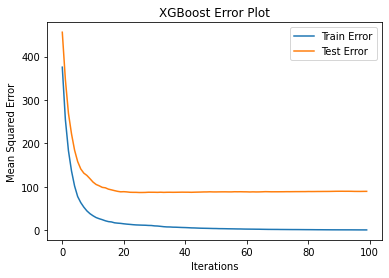

Best Parameters:
{'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'reg_alpha': 0, 'reg_lambda': 0.1, 'subsample': 0.5}
Results:
               Metric     Value
0          Train RMSE  6.596316
1           Test RMSE  9.103736
2           Train MAD  5.064118
3            Test MAD  6.535388
4          Train MAPE  0.105216
5           Test MAPE  0.128897
6  Adjusted R-squared  0.867070
Test Sample:
      Actual   Predicted
527   33.178   33.532104
522   29.685   33.286415
97    46.165   43.598423
238   29.194   30.496347
236   28.673   41.397442
635   97.062   84.117905
222   22.288   27.088572
711   93.102   86.075516
737  130.695  114.528069
219   21.142   22.460976
514  139.425  114.017189
515  140.157  108.184448
873   44.242   47.137283
424   65.210   66.338554
740  143.218  108.142975
679   70.897   80.899406
936   61.919   53.392811
844   35.764   39.712391
930   60.004   69.236610
775   47.321   51.459442
825   29.959   20.000851
465

In [125]:
xgb_best_params, xgb_results_df, xgb_test_sample_df = modeling.model_xgboost(cv=5)
print("Best Parameters:")
print(xgb_best_params)
print("Results:")
print(xgb_results_df)
print("Test Sample:")
print(xgb_test_sample_df)

Modeling using XGBoost shows us that goodness of fit adjusted R-sqaure increases to 0.86 which means its a better fit. XGBoost reduces the test RMSE(9.10) compared to Random Forest(10.93),linear regression(13.04), but its more than train RMSE(6.59) for XGBoost. This gives us an evidence that although complex models have better predictibility, it overfits more than a simpler model. Also in terms of test MAD(6.53)(Mean absolute deviation), it does better than Random Forest(8.29) and Linear regression(9.94) which means better prediction accuracy. But this increased prediction accuracy comes at a cost of less interpretability.

Complex models can also be interpreted using SHAP values. But I would choose linear regression due to its simplicity and interpretability. This this business context will need more interpretability. As Farm owners will ask for reasons when we give them recommendations.

# Interesting Insights / Recommendations


*All insights and recommendations needs a review/feedback from someone who has context about farming. This recommendations are not final and should be reviewed with farming experts.Below are some Insights/recommendations.

1.Yield Column is the output variable and other features(water, area, pesticides, fertilizers, type of persicides) are the input features.Because crop yield is the output of farming process using which farmer earns money. 

2.We do see that there is a relationship between yield and input features we have as simple model like linear regression is able to explain close to 70% variance in the output variable. 

3.Some fertilizers like 0,5,3 have positive coefficients (60.20,5.71,25.54,30.24) in case of linear regression, which means using these fertilizers are expected to increase yield and farmers should use these fertilizers.

4.Some fertilizers like 1,2 have negative coefficients in case of linear regression, which means using these fertilizers are expected to decreasing effect on yield. So farmers should avoid/stop these use of these fertilizers.

5.Region 6 has a positive coeficient(14.69) and Region 5 and 4 have negative coefficiencets(-21.12,-23.08) which means that if its possible to reduce farming in region 4 and 5 and increase farming in region 6, it is expected to increases the yield. Although i agree, changing region of farming is be very difficult.

6.Water per heactare has a positive coefficient(1.25). We recommend to increase the water input per hectares is expected to increase yield.

7.Feature like uv(sun light received per hectare) does not have significant variance importance for modelling yield.


# Conclusion

I have analyzed the dataset. I have done outlier detection, missing value analysis, EDA(Exploratory Data Analysis), Feature Egnieering, Modelling, Checking assumptions of modeling(Linear regression), analyzing the accuracy and then i have highlighted some interesting inghts and recommendations.

This analysis has provided valuable insights into the factors that influence crop yield. The results suggest that a combination of input features such as fertilizers, water, and region can explain approximately 70% of the variance in crop yield.
The analysis highlights the importance of using specific fertilizers (0, 5, and 3) that have a positive impact on yield, while avoiding others (1 and 2) that may have a negative effect. Additionally, the results suggest that increasing water input per hectare and optimizing farming in regions with favorable conditions (such as Region 6) could lead to improved yields.
While some factors, such as UV sunlight received per hectare, do not appear to have a significant impact on yield, the analysis provides a foundation for further investigation and optimization of farming practices.
These insights and recommendations should be reviewed and validated by farming experts to ensure their accuracy and applicability in real-world farming scenarios.

# Future Analysis points

1.Get the insights/recommendations reviewed with Farming experts/stake holders and incorporate their feedback.

2.Reduce overfitting for complex models like Random Forest, XGBoost

3.Work on improving the explainability of complex models using SHAP values and explain it in the narrative document.

5.Implement some more models like Multi layer neural networks.

6.Implement the modeling by transforming some input features or outpur features to see if it improves the prediction accuracy.

7.Write the narravie of the solution which can be used to present the project to stake holders, take feedback, re iterate and finalize the narrative document.


